# Devanga Deheragoda (S3992417)

# Task 1: Regression 

In [120]:
import pandas as pd
A2data = pd.read_csv('Downloads/A2data.csv', delimiter=';')
A2data.head()
A2data.count()
print(A2data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [121]:
object_columns = ['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 
                      'density']

A2data[object_columns] = A2data[object_columns].apply(pd.to_numeric, errors='coerce')
print(A2data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


### Taking a sample of 200 rows and ensure that there are no missing values in the data

In [122]:
A2_sample = A2data.dropna().sample(200, random_state=42)

In [123]:
A2_sample.to_csv('S3992417-A2SampleOne.csv', index=False)

### Selecting two variables: Alcohol and Density

In [124]:
alcohol_density_data = A2_sample[['alcohol', 'density']]
print(alcohol_density_data.head())

      alcohol  density
1593     10.7  0.99320
3192     12.0  0.98990
545       9.9  0.99530
2663     11.2  0.99126
4453     12.4  0.98914


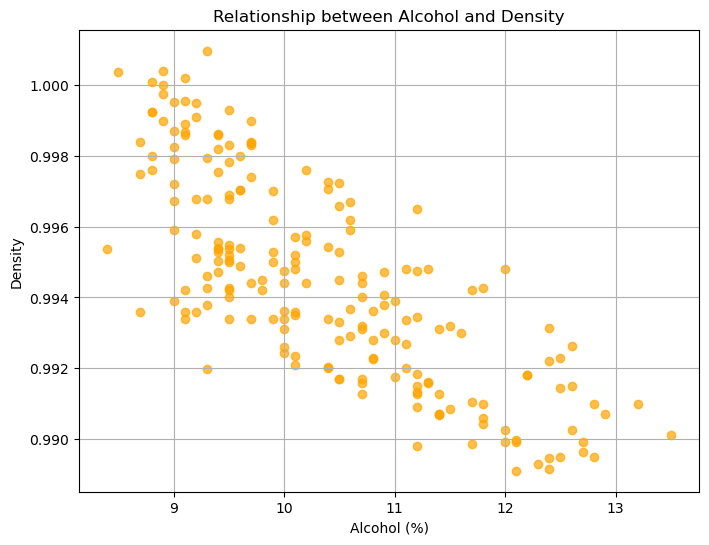

In [125]:
# Plot the relationship between alcohol and density
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(alcohol_density_data['alcohol'], alcohol_density_data['density'], alpha=0.7, color='orange')
plt.title('Relationship between Alcohol and Density')
plt.xlabel('Alcohol (%)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = A2_sample['density'].values.reshape(-1, 1) 
y = A2_sample['alcohol']   

# Creating the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

model = LinearRegression().fit(X, y)

r_sq = model.score(X, y)
print(f"R_squared: {r_sq}")

print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"MSE: {mse}")

R_squared: 0.599183901334266
intercept: 319.27119835721044
slope: [-310.62930327]
MSE: 0.5366029733073167


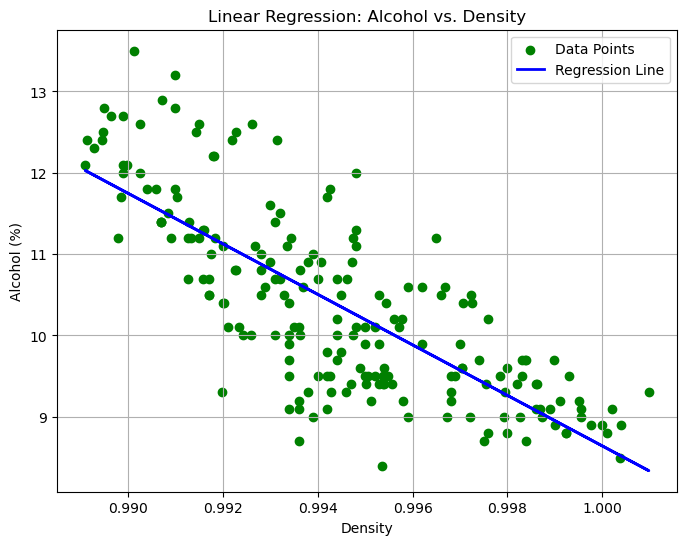

In [127]:
# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='green', label='Data Points')
plt.plot(X, y_pred, color='blue', label='Regression Line', linewidth=2)
plt.title('Linear Regression: Alcohol vs. Density')
plt.xlabel('Density')
plt.ylabel('Alcohol (%)')
plt.legend()
plt.grid(True)
plt.show()

# Task 2: Classification

In [128]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [129]:
A2_sample_two = A2data.dropna().sample(1000, random_state=42)
A2_sample_two.to_csv('S3992417-A2SampleTwo.csv', index=False)

First, an automated function was created to identify which value of K provided the highest accuracy

Accuracy for K=1: 0.41333
Accuracy for K=2: 0.41667
Accuracy for K=3: 0.39000
Accuracy for K=4: 0.42333
Accuracy for K=5: 0.42333
Accuracy for K=6: 0.40667
Accuracy for K=7: 0.42333
Accuracy for K=8: 0.44333
Accuracy for K=9: 0.42333
Accuracy for K=10: 0.41333
Accuracy for K=11: 0.41333
Accuracy for K=12: 0.41333
Accuracy for K=13: 0.42000
Accuracy for K=14: 0.41667
Accuracy for K=15: 0.42667
Accuracy for K=16: 0.43333
Accuracy for K=17: 0.43333
Accuracy for K=18: 0.43333
Accuracy for K=19: 0.43667
Accuracy for K=20: 0.42667


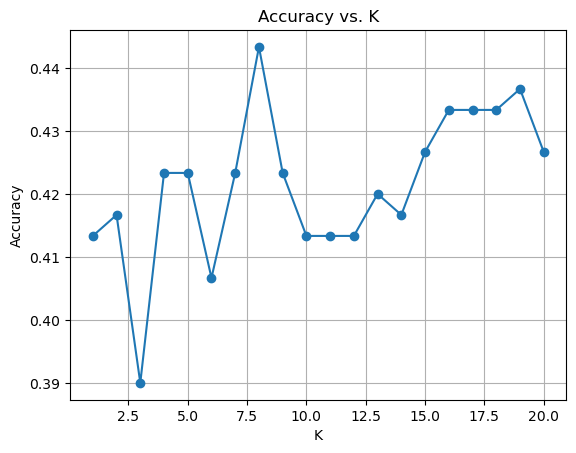

In [130]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = A2_sample_two.drop('quality', axis=1) 
y = A2_sample_two['quality']  

# List to store accuracy for each value of K
accuracy_values = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Loop over a range of K values 
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_knn)
    accuracy_values.append(accuracy)
    print(f"Accuracy for K={k}: {accuracy:.5f}")

# Plot the accuracy values for each K
plt.plot(k_values, accuracy_values, marker='o')  # Added marker for better visualization
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K')
plt.grid(True)
plt.show()

Accuracy (k = 8): 0.4433

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.50      0.17      0.25         6
           5       0.43      0.54      0.48        98
           6       0.49      0.57      0.52       136
           7       0.12      0.04      0.06        48
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2

    accuracy                           0.44       300
   macro avg       0.22      0.19      0.19       300
weighted avg       0.39      0.44      0.41       300

Confusion Matrix:
 [[ 0  0  1  1  0  0  0]
 [ 0  1  1  4  0  0  0]
 [ 0  0 53 39  6  0  0]
 [ 0  1 49 77  9  0  0]
 [ 0  0 15 31  2  0  0]
 [ 0  0  4  4  0  0  0]
 [ 0  0  0  2  0  0  0]]


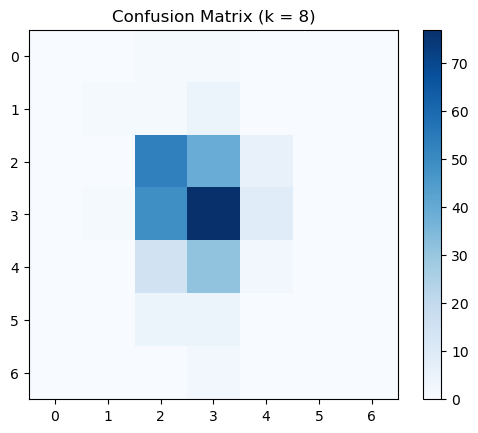

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

X = A2_sample_two.drop('quality', axis=1) 
y = A2_sample_two['quality'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k = 8
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (k = {k}): {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, cmap='Blues')
plt.title(f'Confusion Matrix (k = {k})')
plt.colorbar()
plt.show()

## Modified KNN
- To modify the KNN classifier, the hill climbing method was used to search for the best subset of features to identify the set with the highest accuracy. 

In [132]:
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Function to implement hill climbing feature selection
def hill_climbing_feature_selection(X_train, y_train, X_test, y_test, n_neighbors=10, weights='distance', p=1):
    col_num = X_train.shape[1]  # Number of features
    selected_features = []
    best_accuracy = 0.0
    
    # Shuffle feature indices to start with a random order
    feature_indices = shuffle(range(col_num), random_state=42)
    
    # Perform hill climbing feature selection
    for feature in feature_indices:
        current_features = selected_features + [feature]
        
        # Train the kNN model with the selected features and best parameters
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, p=p)
        knn.fit(X_train.iloc[:, current_features], y_train)
        
        # Predict and evaluate on the test set
        y_pred = knn.predict(X_test.iloc[:, current_features])
        accuracy = accuracy_score(y_test, y_pred)
        
        # Output the accuracy for the current feature combination==
        print(f"Features: {current_features}, Accuracy: {accuracy:.5f}")
        
        # If the accuracy improves, keep the feature
        if accuracy > best_accuracy:
            selected_features.append(feature)
            best_accuracy = accuracy
            print(f"Feature {feature} added. New best accuracy: {best_accuracy:.5f}")
        else:
            print(f"Feature {feature} discarded.")
    
    return selected_features, best_accuracy

# Apply hill climbing for feature selection using the best parameters
selected_features, final_accuracy = hill_climbing_feature_selection(X_train, y_train, X_test, y_test, n_neighbors=10, weights='distance', p=1)

print(f"Selected Features: {selected_features}")
print(f"Final Accuracy after Feature Selection: {final_accuracy:.5f}")


Features: [5], Accuracy: 0.41667
Feature 5 added. New best accuracy: 0.41667
Features: [5, 0], Accuracy: 0.44000
Feature 0 added. New best accuracy: 0.44000
Features: [5, 0, 9], Accuracy: 0.42333
Feature 9 discarded.
Features: [5, 0, 10], Accuracy: 0.50333
Feature 10 added. New best accuracy: 0.50333
Features: [5, 0, 10, 2], Accuracy: 0.48667
Feature 2 discarded.
Features: [5, 0, 10, 1], Accuracy: 0.51333
Feature 1 added. New best accuracy: 0.51333
Features: [5, 0, 10, 1, 8], Accuracy: 0.50333
Feature 8 discarded.
Features: [5, 0, 10, 1, 4], Accuracy: 0.51333
Feature 4 discarded.
Features: [5, 0, 10, 1, 7], Accuracy: 0.51667
Feature 7 added. New best accuracy: 0.51667
Features: [5, 0, 10, 1, 7, 3], Accuracy: 0.49000
Feature 3 discarded.
Features: [5, 0, 10, 1, 7, 6], Accuracy: 0.47667
Feature 6 discarded.
Selected Features: [5, 0, 10, 1, 7]
Final Accuracy after Feature Selection: 0.51667


Based on the above output, it was identified that the highest accuracy can be gained from selecting the feature 5,0, 10, 1 and 7. From that, the classifier was run again and the following output was obtained: 

In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the selected features from hill climbing
selected_features = [5, 0, 10, 1, 7]

# Train the final kNN model with the selected features
final_knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
final_knn.fit(X_train.iloc[:, selected_features], y_train)

# Predict on the test data with the selected features
y_pred_final = final_knn.predict(X_test.iloc[:, selected_features])

# Evaluate the final model
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy with Selected Features: {final_accuracy:.5f}")

# Print classification report for further evaluation
print("Classification Report for Final Model:")
print(classification_report(y_test, y_pred_final))

# Confusion matrix to see the distribution of predicted classes
print("Confusion Matrix for Final Model:")
print(confusion_matrix(y_test, y_pred_final))


Final Accuracy with Selected Features: 0.51667
Classification Report for Final Model:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.51      0.57      0.54        98
           6       0.55      0.60      0.57       136
           7       0.44      0.33      0.38        48
           8       0.50      0.12      0.20         8
           9       0.00      0.00      0.00         2

    accuracy                           0.52       300
   macro avg       0.29      0.23      0.24       300
weighted avg       0.50      0.52      0.50       300

Confusion Matrix for Final Model:
[[ 0  0  2  0  0  0  0]
 [ 0  0  2  3  1  0  0]
 [ 0  2 56 34  5  1  0]
 [ 0  0 41 82 13  0  0]
 [ 0  1  7 24 16  0  0]
 [ 0  0  1  5  1  1  0]
 [ 0  0  0  2  0  0  0]]


## Decision Tree 

In [134]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Initialise decision tree classifer

Decision Tree Accuracy: 0.4900

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.12      0.33      0.17         6
           5       0.56      0.53      0.54        98
           6       0.60      0.53      0.56       136
           7       0.33      0.42      0.37        48
           8       0.14      0.12      0.13         8
           9       0.00      0.00      0.00         2

    accuracy                           0.49       300
   macro avg       0.25      0.28      0.25       300
weighted avg       0.51      0.49      0.50       300

Confusion Matrix (Decision Tree):
 [[ 0  0  0  1  1  0  0]
 [ 0  2  0  3  1  0  0]
 [ 0 13 52 27  6  0  0]
 [ 1  1 32 72 27  3  0]
 [ 0  1  9 15 20  3  0]
 [ 1  0  0  3  3  1  0]
 [ 0  0  0  0  2  0  0]]


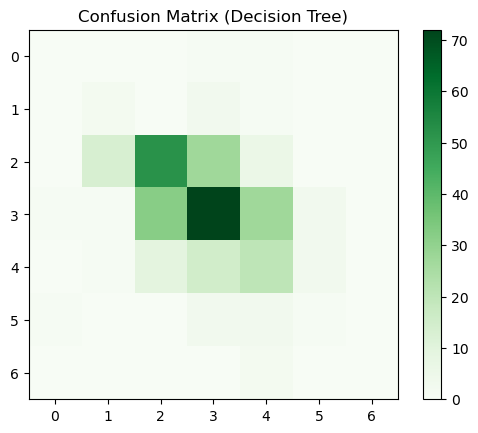

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Print the classification report and confusion matrix
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_pred_dt))

# Plot confusion matrix for Decision Tree
plt.imshow(confusion_matrix(y_test, y_pred_dt), cmap='Greens')
plt.title('Confusion Matrix (Decision Tree)')
plt.colorbar()
plt.show()

In [136]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter ranges
max_depth_range = range(3, 10)
min_samples_split_range = [2, 5, 10]
min_samples_leaf_range = [1, 2, 4]

# Variable to store the best accuracy and best parameters
best_accuracy = 0.0
best_params = {}

# Manual grid search using loops
for max_depth in max_depth_range:
    for min_samples_split in min_samples_split_range:
        for min_samples_leaf in min_samples_leaf_range:
            # Initialize the Decision Tree with the current set of parameters
            dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)
            
            # Train the model
            dt.fit(X_train, y_train)
            
            # Predict on the test set
            y_pred = dt.predict(X_test)
            
            # Evaluate the accuracy
            accuracy = accuracy_score(y_test, y_pred)
            
            # Output the results for each parameter combination
            print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}, Accuracy={accuracy:.4f}")
            
            # If the current accuracy is better than the best recorded accuracy, update the best parameters
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

# Output the best parameters and best accuracy
print(f"\nBest Accuracy: {best_accuracy:.4f}")
print(f"Best Parameters: {best_params}")


max_depth=3, min_samples_split=2, min_samples_leaf=1, Accuracy=0.4767
max_depth=3, min_samples_split=2, min_samples_leaf=2, Accuracy=0.4767
max_depth=3, min_samples_split=2, min_samples_leaf=4, Accuracy=0.4767
max_depth=3, min_samples_split=5, min_samples_leaf=1, Accuracy=0.4767
max_depth=3, min_samples_split=5, min_samples_leaf=2, Accuracy=0.4767
max_depth=3, min_samples_split=5, min_samples_leaf=4, Accuracy=0.4767
max_depth=3, min_samples_split=10, min_samples_leaf=1, Accuracy=0.4767
max_depth=3, min_samples_split=10, min_samples_leaf=2, Accuracy=0.4767
max_depth=3, min_samples_split=10, min_samples_leaf=4, Accuracy=0.4767
max_depth=4, min_samples_split=2, min_samples_leaf=1, Accuracy=0.5167
max_depth=4, min_samples_split=2, min_samples_leaf=2, Accuracy=0.5167
max_depth=4, min_samples_split=2, min_samples_leaf=4, Accuracy=0.5167
max_depth=4, min_samples_split=5, min_samples_leaf=1, Accuracy=0.5167
max_depth=4, min_samples_split=5, min_samples_leaf=2, Accuracy=0.5167
max_depth=4, min_

Final Decision Tree Accuracy with Best Parameters: 0.5233

Classification Report (Best Decision Tree):
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         6
           5       0.56      0.63      0.59        98
           6       0.57      0.54      0.56       136
           7       0.38      0.44      0.41        48
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         2

    accuracy                           0.52       300
   macro avg       0.22      0.23      0.22       300
weighted avg       0.50      0.52      0.51       300

Confusion Matrix (Best Decision Tree):
 [[ 0  0  0  2  0  0  0]
 [ 0  0  2  3  1  0  0]
 [ 0  4 62 28  4  0  0]
 [ 0  0 36 74 26  0  0]
 [ 0  1  9 17 21  0  0]
 [ 0  0  2  3  3  0  0]
 [ 0  0  0  2  0  0  0]]


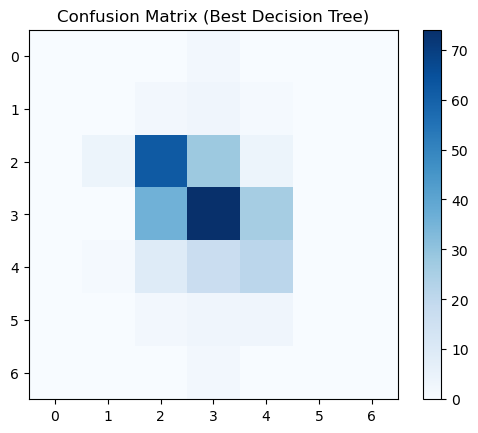

In [137]:
# Retrain the Decision Tree with the best parameters found from manual grid search
dt_best = DecisionTreeClassifier(max_depth=7, 
                                 min_samples_split=10, 
                                 min_samples_leaf=4, 
                                 random_state=42)

# Train the model
dt_best.fit(X_train, y_train)

# Predict on the test data
y_pred_best = dt_best.predict(X_test)

# Evaluate the model using accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Final Decision Tree Accuracy with Best Parameters: {accuracy_best:.4f}")

# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report (Best Decision Tree):\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix (Best Decision Tree):\n", confusion_matrix(y_test, y_pred_best))

# Plot Confusion Matrix
import matplotlib.pyplot as plt
plt.imshow(confusion_matrix(y_test, y_pred_best), cmap='Blues')
plt.title(f'Confusion Matrix (Best Decision Tree)')
plt.colorbar()
plt.show()

## Model comparison

In [138]:
# Evaluate the Decision Tree model using the best parameters
accuracy_dt_best = accuracy_score(y_test, y_pred_best)
print(f"Final decision tree accuracy with best parameters: {accuracy_dt_best:.4f}")

# Evaluate the kNN model using k = 14 (or any other value of k you are using)
k = 8  
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Original KNN accuracy (k = {k}): {accuracy:.4f}")


Final decision tree accuracy with best parameters: 0.5233
Original KNN accuracy (k = 8): 0.4433


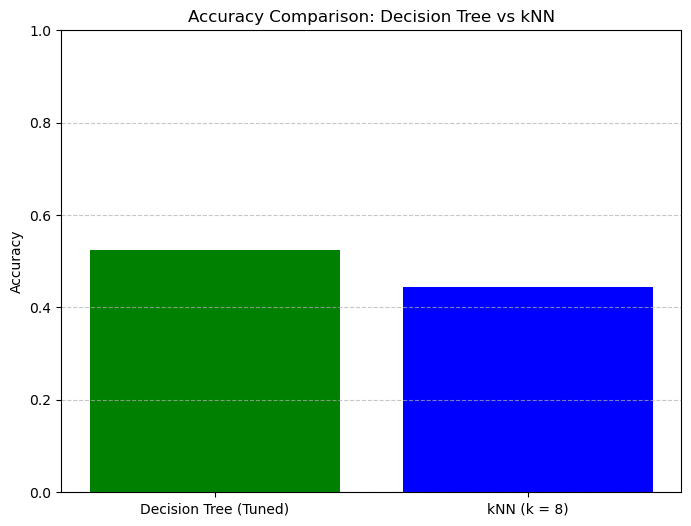

In [139]:
import matplotlib.pyplot as plt

# Model names and their corresponding accuracies
models = ['Decision Tree (Tuned)', f'kNN (k = {k})']
accuracy_values = [accuracy_dt_best, accuracy]

# Create a bar chart to compare accuracies
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_values, color=['green', 'blue'])

# Add labels and title
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Decision Tree vs kNN')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 (0% to 100%)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Task 3: Clustering

In [140]:
A2_sample_three = A2data.dropna().sample(300, random_state=42)
A2_sample_three.to_csv('S3992417-A2SampleThree.csv', index=False)

In [141]:
# Remove the 'quality' column, which is the target variable
X = A2_sample_three.drop(columns=['quality'])

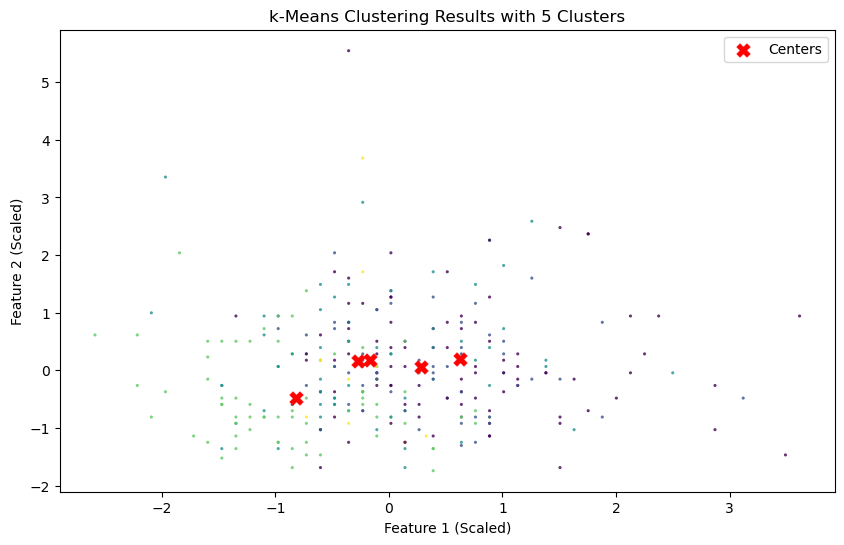

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

os.environ["OMP_NUM_THREADS"] = "2"

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Set the number of clusters
K_dataset_2 = 5

# Initialize and fit the k-Means algorithm
km_2 = KMeans(n_clusters=K_dataset_2, n_init=10, random_state=42)
labels_2 = km_2.fit(X_scaled).labels_

# Plot the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_2, alpha=0.8, s=5.0, lw=0)

# Plot the cluster centers
plt.scatter(km_2.cluster_centers_[:, 0], km_2.cluster_centers_[:, 1], s=100, c='red', marker='X', lw=0.2, label='Centers')

# Customize plot labels and title
plt.title(f'k-Means Clustering Results with {K_dataset_2} Clusters')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()


The data points seem relatively spread out, with some clusters having tighter groupings than others.

In [143]:
from sklearn.cluster import KMeans

# Set the number of clusters 
k = 4

# Initialize and fit the k-Means algorithm
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  

#kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels (which cluster each point belongs to)
cluster_labels = kmeans.labels_


In [144]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Inertia (Within-Cluster Sum of Squares)
inertia = kmeans.inertia_

# Calculate Silhouette Score (measuring how similar a point is to its own cluster compared to others)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies-Bouldin Index (lower is better, measures the average similarity ratio between clusters)
db_score = davies_bouldin_score(X_scaled, cluster_labels)

print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_score}')

Inertia: 2112.7934328718347
Silhouette Score: 0.16226377061270505
Davies-Bouldin Index: 1.9084701681551235


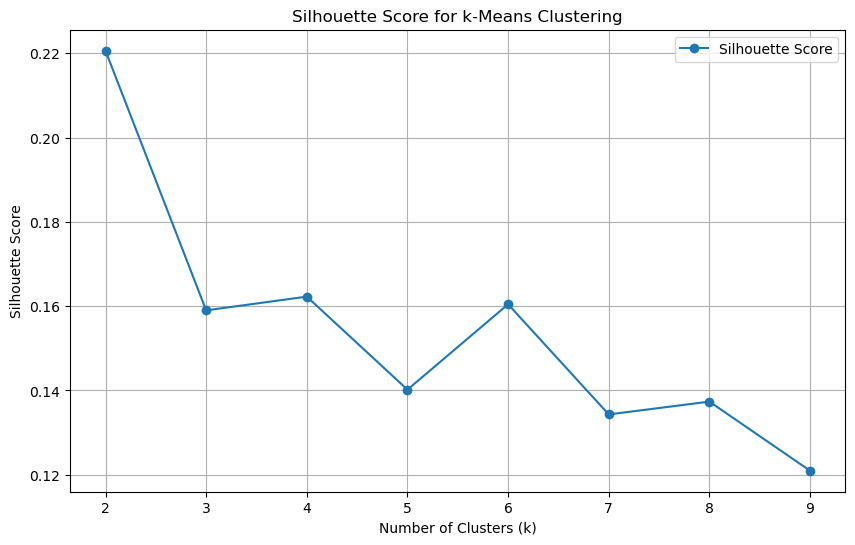

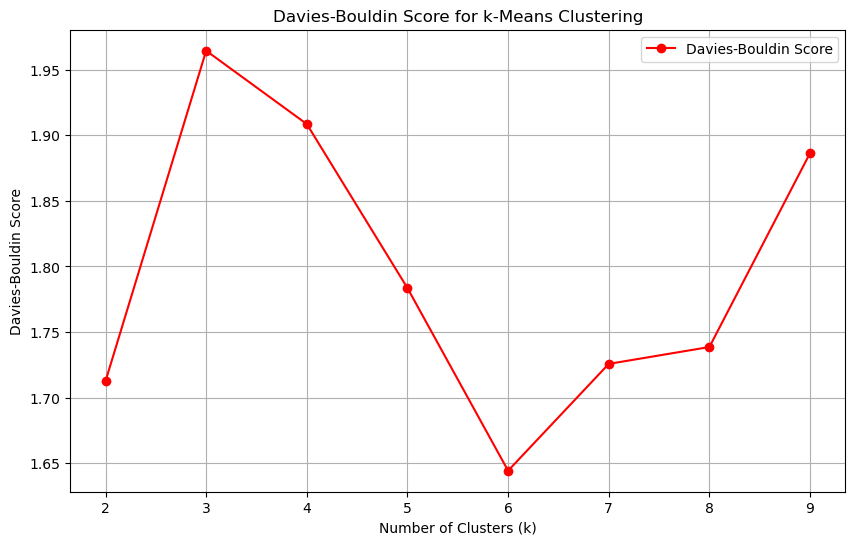

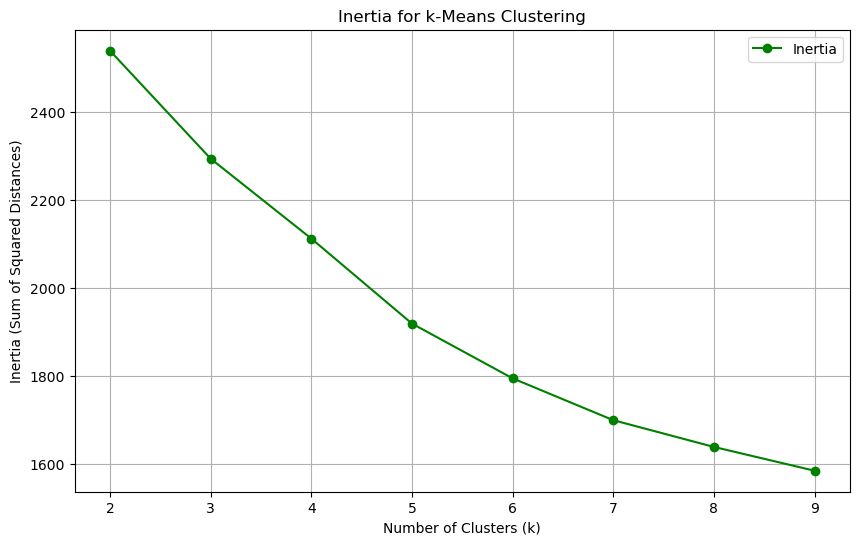

In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import os

# Set OMP_NUM_THREADS to avoid memory leak warning
os.environ["OMP_NUM_THREADS"] = "2"

# Define the range of k values to explore
k_values = range(2, 10)
silhouette_scores = []
davies_bouldin_scores = []
inertia_values = []  # To store inertia values

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))
    inertia_values.append(kmeans.inertia_)  # Store inertia

plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for k-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(k_values, davies_bouldin_scores, marker='o', color='red', label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Score for k-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Plot the inertia values for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', color='green', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Inertia for k-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

Based on the above outputs, it can be identifed that:
k = 2 provides the highest Silhouette Score, indicating the best separation between clusters, though it may oversimplify the data. The Davies-Bouldin Index improves after k = 5, but there is not much difference between k = 4 and k = 5, while Inertia shows a more noticeable decreasing trend after k = 4. This suggests that adding more clusters beyond 4 may not significantly enhance the clustering quality. Therefore, k = 4 will be chosen for further analysis.

Next, DBSCAN was used to make the clustering better. 

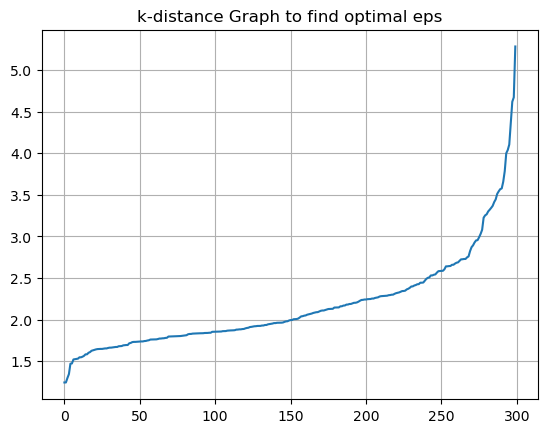

In [146]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Use NearestNeighbors to find the optimal epsilon 
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])  
plt.plot(distances)
plt.ylabel
plt.xlabel
plt.title('k-distance Graph to find optimal eps')
plt.grid(True)
plt.show()


This k-distance graph is used to help determine the optimal value of epsilon for the DBSCAN algorithm. This graph helps to find an "elbow point" where the slope of the curve sharply increases. In the above plot, it can be seen that the sharp increase happens around a distance of 2.5. The minimum sample value was set to 3 as initially it was set to 5, however the algorithm did not return any clusters, and there was a significant improvement after said reduction. 

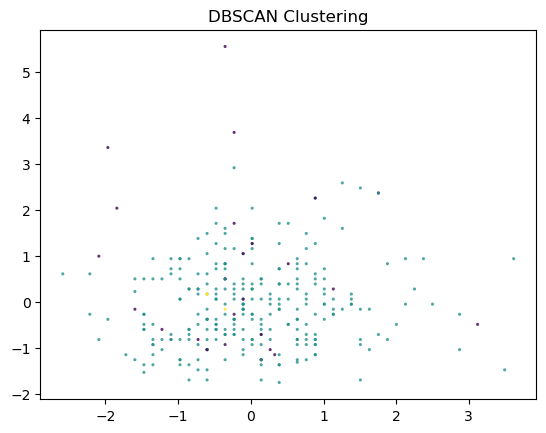

Number of clusters: 2
Number of noise points: 25


In [147]:
eps_value = 2.5
min_samples_value = 3  
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)

# Fit and predict the cluster labels
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, alpha=0.8, s=5.0, lw=0)
plt.title('DBSCAN Clustering')
plt.show()

unique_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters: {unique_clusters}")

n_noise = np.sum(dbscan_labels == -1)
print(f"Number of noise points: {n_noise}")


The algorithm has identified 2 clusters in the dataset where 25 data points are considered noise by the algorithm, meaning these points are not assigned to any cluster.

The two clusters are somewhat densely packed in the center, while the noise points are more spread out, especially in the outer regions of the plot.

In [148]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
print(f'Silhouette Score (DBSCAN): {silhouette_dbscan}')

# Calculate Davies-Bouldin Index
db_score_dbscan = davies_bouldin_score(X_scaled, dbscan_labels)
print(f'Davies-Bouldin Index (DBSCAN): {db_score_dbscan}')

Silhouette Score (DBSCAN): 0.22676133104553675
Davies-Bouldin Index (DBSCAN): 3.2174408937881425


Silhouette Score:
In this case, a score of 0.227 suggests that the clusters are moderately well-separated, but there may still be significant overlap or ambiguity between clusters. 

Davies-Bouldin Index:
The Davies-Bouldin Index of 3.217 further suggests that the clusters are not well-separated, and the variance within the clusters is high, making the cluster boundaries unclear.

## Model Comparison

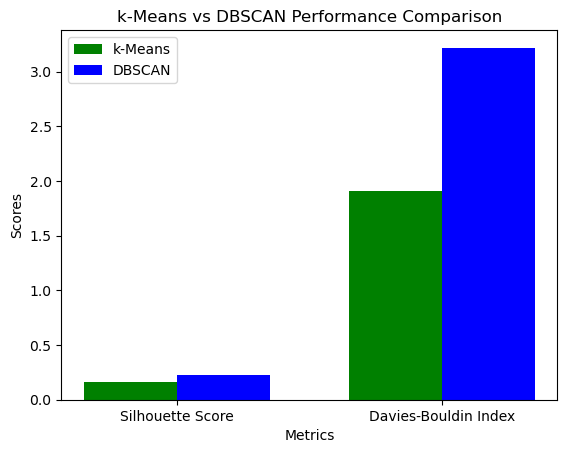

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for k-Means and DBSCAN
silhouette_kmeans = 0.16226377061270505
davies_bouldin_kmeans = 1.9084701681551235

silhouette_dbscan = 0.22676133104553675
davies_bouldin_dbscan = 3.2174408937881425

# Labels and data
metrics = ['Silhouette Score', 'Davies-Bouldin Index']
kmeans_scores = [silhouette_kmeans, davies_bouldin_kmeans]
dbscan_scores = [silhouette_dbscan, davies_bouldin_dbscan]

# Create a bar chart
x = np.arange(len(metrics))  
width = 0.35 

fig, ax = plt.subplots()
bars_kmeans = ax.bar(x - width/2, kmeans_scores, width, label='k-Means', color='green')
bars_dbscan = ax.bar(x + width/2, dbscan_scores, width, label='DBSCAN', color='blue')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('k-Means vs DBSCAN Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

DBSCAN shows a slightly higher Silhouette Score compared to k-Means, indicating that DBSCAN provides better separation between clusters. However, when looking at the Davies-Bouldin Index (where a lower value is better), k-Means performs more favorably, suggesting stronger overall cluster cohesion. In summary, while DBSCAN excels in cluster separation, k-Means demonstrates better overall clustering performance based on the Davies-Bouldin Index.